# Classification and Regression, Part 1 - Exercise

In [303]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# Exercise 1. Univariate Classification

---

### About the data

---
The dataset you will use for today exercise is a modified version of Computers https://www.timeseriesclassification.com/description.php?Dataset=Computers

These problems were taken from data recorded as part of government sponsored study called Powering the Nation. The intention was to collect behavioural data about how consumers use electricity within the home to help reduce the UK's carbon footprint. The data contains readings from 251 households, sampled in two-minute intervals over a month. Each series is length 720 (24 hours of readings taken every 2 minutes). Classes are Desktop and Laptop.



---

### Read the data

Load the numpy files X_train_computers.npy, X_test_computers.npy, y_train_computers.npy, y_test_computers.npy


In [304]:
X_train = np.load('data/X_train_computers.npy')
X_test = np.load('data/X_test_computers.npy')

y_train = np.load('data/y_train_computers.npy')
y_test = np.load('data/y_test_computers.npy')

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(251, 1, 720)
(250, 1, 720)
(251,)
(250,)


In [305]:
X_train_df = pd.DataFrame(X_train.squeeze().T)
X_test_df = pd.DataFrame(X_test.squeeze().T)
y_train_df = pd.Series(y_train)
y_test_df = pd.Series(y_test)

In [306]:
print(X_train_df.shape)
print(X_test_df.shape)

(720, 251)
(720, 250)


---

## Data Understanding/Preparation

Try to understand the data first... Plot some of the data, what do you see? Ask yourself a few questions:
- How many classes are there? Are the classes balanced?
- Are there any missing values?
- Are there outlier values? (hint: make a boxplot of all the data)

---

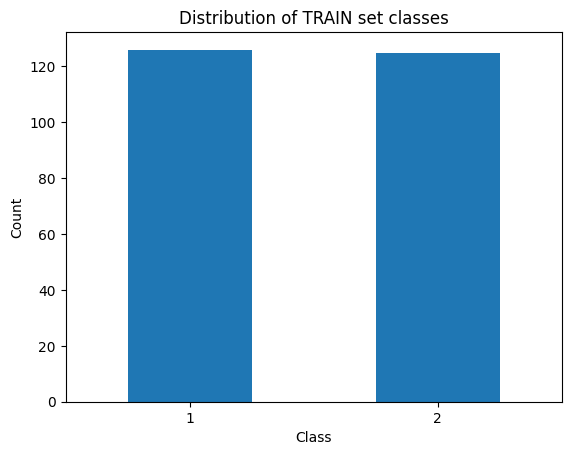

In [307]:
y_train_df.value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of TRAIN set classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

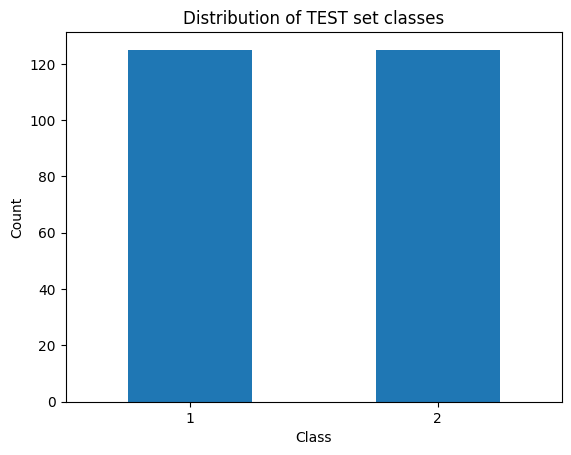

In [308]:
y_test_df.value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of TEST set classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

#### How many classes are there? Are the classes balanced?

In [309]:
# fill the nan values
mean = X_train_df.mean()
X_train_df.fillna(mean, inplace=True)
X_test_df.fillna(mean, inplace=True)

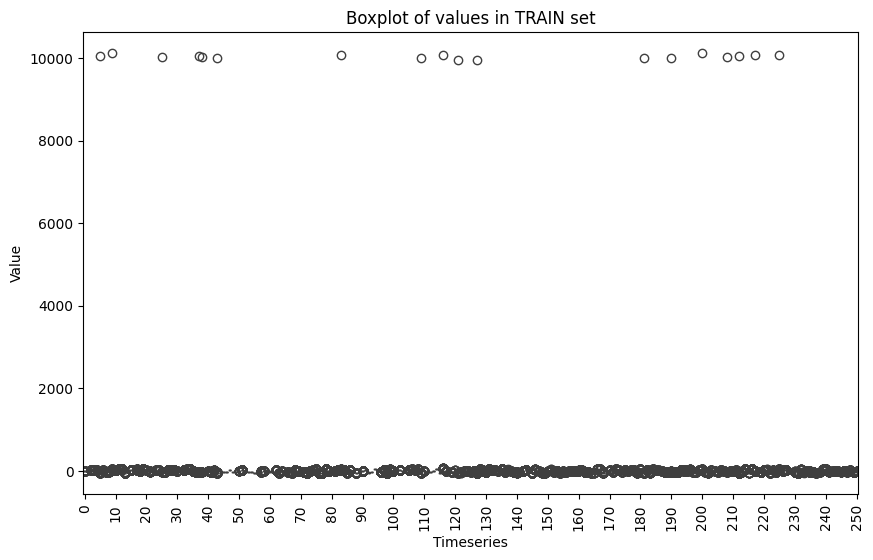

In [310]:
# boxplot on data to check outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_train_df) 
plt.title('Boxplot of values in TRAIN set')
plt.ylabel('Value')
# Set x values only each one 10th column
plt.xticks(np.arange(0, X_train_df.shape[1], 10), rotation=90)
plt.xlabel('Timeseries')
plt.show()

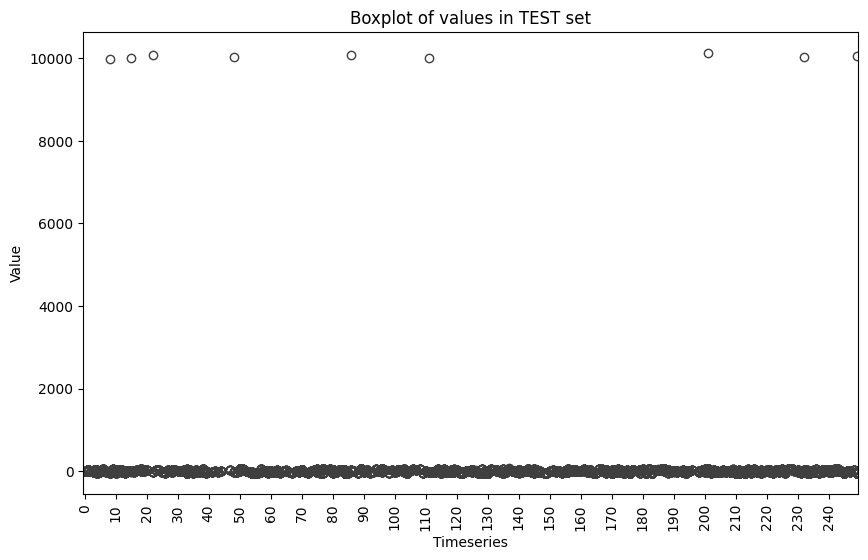

In [311]:
# boxplot on data to check outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_test_df) 
plt.title('Boxplot of values in TEST set')
plt.ylabel('Value')
# Set x values only each one 10th column
plt.xticks(np.arange(0, X_test_df.shape[1], 10), rotation=90)
plt.xlabel('Timeseries')
plt.show()

In [312]:
# Replace outlies with the mean
X_train_df = X_train_df.mask(X_train_df > 1e3, X_train_df.mean(), axis=1)
X_test_df = X_test_df.mask(X_test_df > 1e3, X_test_df.mean(), axis=1)

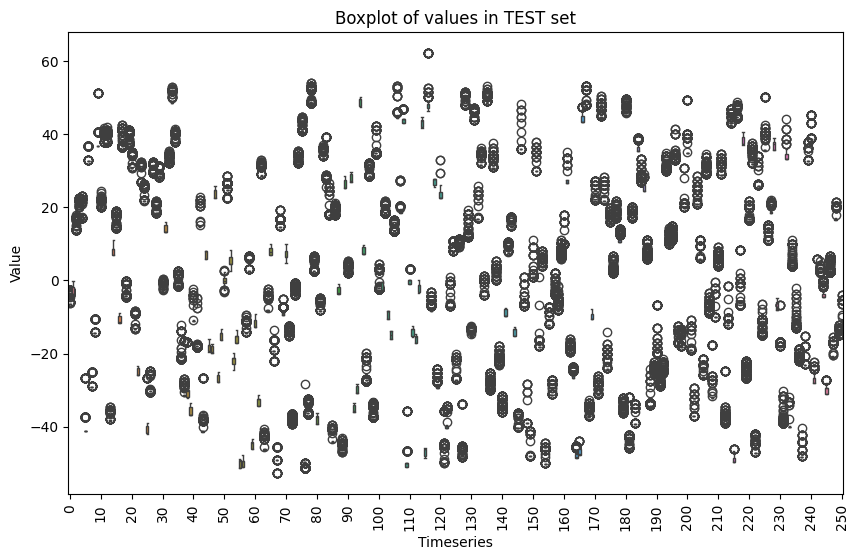

In [313]:
# boxplot on data to check outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_train_df)
plt.title('Boxplot of values in TEST set')
plt.ylabel('Value')
plt.xticks(np.arange(0, X_train_df.shape[1], 10), rotation=90)
plt.xlabel('Timeseries')
plt.show()

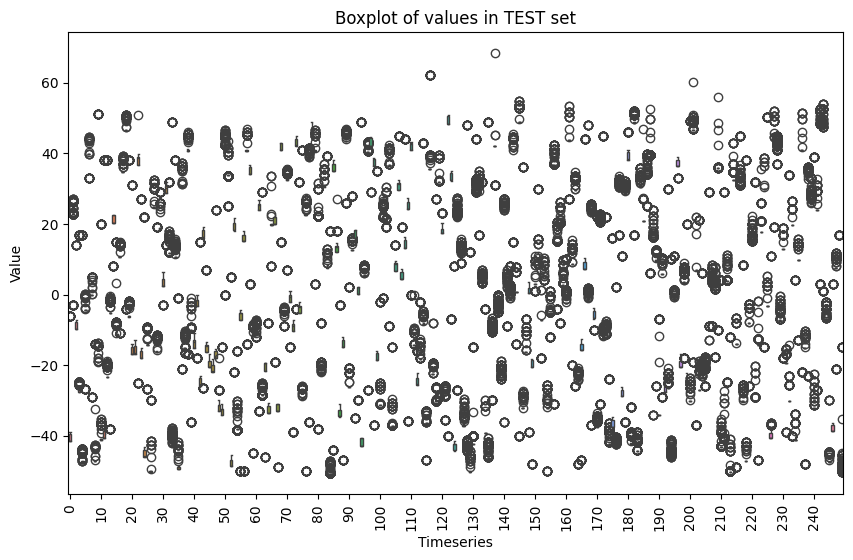

In [314]:
# boxplot on data to check outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_test_df)
plt.title('Boxplot of values in TEST set')
plt.ylabel('Value')
plt.xticks(np.arange(0, X_test_df.shape[1], 10), rotation=90)
plt.xlabel('Timeseries')
plt.show()

#### Are there any missing values?

In [334]:
# Check missing values
print(X_train_df.isnull().sum().sum())
print(X_test_df.isnull().sum().sum())

0
0


#### Are there any outlier values?

---

#### Deal with the problems you found in the previous step. E.g., remove missing values, remove outliers, etc.

In [316]:
from sktime.transformations.series.impute import Imputer

---

## Classification
After you removed the main problems in the data, you can start the classification process.
Does the dataset need further preprocessing (normalization maybe)? If so, do it. Use the LabelEncoder to transform the target variable in a numerical format.

### Goal
Your goal here is to find the best possible classification pipeline to predict the class of the computers dataset. You can use any classifier you saw in the course up to now.

### Hyperparameter tuning
Try to find the best hyperparameters for your model. You can a validation set, cross validation or a GridSearchCV or RandomizedSearchCV for this task.

### Evaluation
Don't overfit the test set! Only once you think you found the best model, test performance on the test set. Find the model that has the highest ROC AUC score.

In [335]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [336]:
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier

In [337]:
X_tr = X_train_df.values
y_tr = y_train_df.values
# From (L, N) to (N, 1, L)
X_tr = X_tr.reshape(X_tr.shape[1], 1, X_tr.shape[0])

X_ts = X_test_df.values
y_ts = y_test_df.values
# From (L, N) to (N, 1, L)
X_ts = X_ts.reshape(X_ts.shape[1], 1, X_ts.shape[0])

print(X_tr.shape)
print(y_tr.shape)
print(X_ts.shape)
print(y_ts.shape)

(251, 1, 720)
(251,)
(250, 1, 720)
(250,)


/tmp/ipykernel_13046/1726142965.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


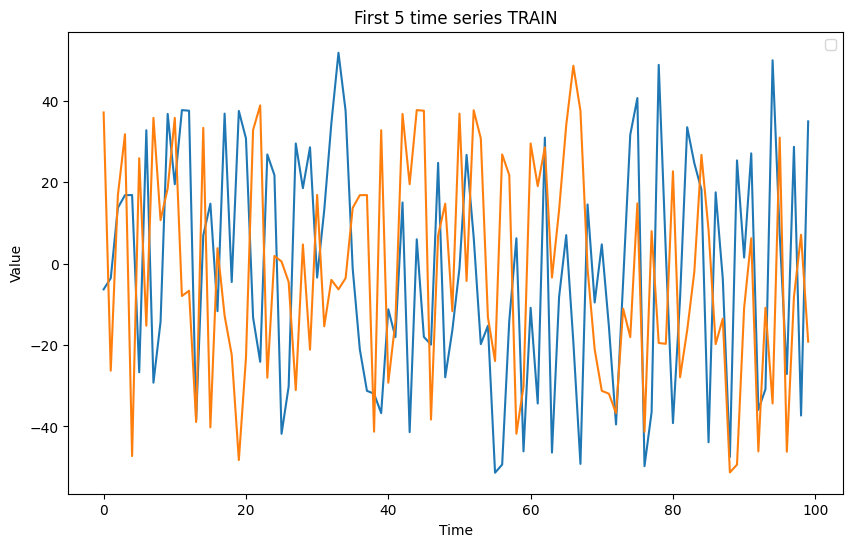

In [338]:
# plot the first k time series
k = 2
plt.figure(figsize=(10, 6))
for i in range(k):
    plt.plot(X_tr[i, 0, :100])
plt.title('First 5 time series TRAIN')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

/tmp/ipykernel_13046/3764432870.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


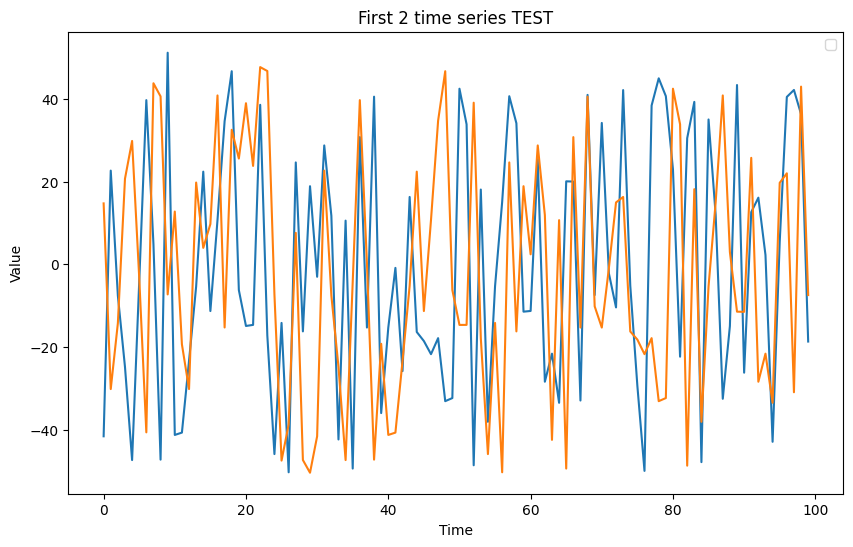

In [321]:
# plot the first k time series
k = 2
plt.figure(figsize=(10, 6))
for i in range(k):
    plt.plot(X_ts[i, 0, :100])
plt.title(f'First {k} time series TEST')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [322]:
# # Standardize the data
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train_df)

In [342]:
n_neighbors_list = [1, 3, 5]
distances_list = ["euclidean"]

grid = GridSearchCV(
    estimator=KNeighborsTimeSeriesClassifier(distance=distances_list[0]),
    param_grid={"n_neighbors": n_neighbors_list, "distance": distances_list},
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    scoring="accuracy",
    verbose=1,
    n_jobs=-1,
)

grid.fit(X_tr, y_tr)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsTimeSeriesClassifier(distance='euclidean'),
             n_jobs=-1,
             param_grid={'distance': ['euclidean'], 'n_neighbors': [1, 3, 5]},
             scoring='accuracy', verbose=1)

In [343]:
grid.best_params_

{'distance': 'euclidean', 'n_neighbors': 5}

In [344]:
best_df = pd.DataFrame(grid.cv_results_)
best_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_distance,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.034023,0.032711,0.142519,0.122998,euclidean,1,"{'distance': 'euclidean', 'n_neighbors': 1}",0.156863,0.18,0.14,0.14,0.16,0.155373,0.014851,3
1,0.007603,0.003150,0.031405,0.010797,euclidean,3,"{'distance': 'euclidean', 'n_neighbors': 3}",0.294118,0.20,0.24,0.32,0.30,0.270824,0.044223,2
2,0.006398,0.002874,0.025519,0.001909,euclidean,5,"{'distance': 'euclidean', 'n_neighbors': 5}",0.549020,0.46,0.50,0.44,0.50,0.489804,0.037638,1


In [350]:
y_pred_tr = grid.predict(X_tr)
y_pred_ts = grid.predict(X_ts)

from sklearn.metrics import classification_report
print("TRAIN classification report:")
print(classification_report(y_tr, y_pred_tr))
print("#" * 60, "\n")

print("TEST classification report:")
print(classification_report(y_ts, y_pred_ts))

TRAIN classification report:
              precision    recall  f1-score   support

           1       0.62      0.63      0.62       126
           2       0.62      0.61      0.61       125

    accuracy                           0.62       251
   macro avg       0.62      0.62      0.62       251
weighted avg       0.62      0.62      0.62       251

############################################################ 

TEST classification report:
              precision    recall  f1-score   support

           1       0.50      0.50      0.50       125
           2       0.50      0.51      0.51       125

    accuracy                           0.50       250
   macro avg       0.50      0.50      0.50       250
weighted avg       0.50      0.50      0.50       250



In [352]:
n_neighbors_list = [1, 3, 5]
distances_list = ["dtw"]
distance_params_list = [{"window": 0.1}, {"window": 0.2}]

grid = GridSearchCV(
    estimator=KNeighborsTimeSeriesClassifier(distance="dtw"),
    param_grid={"n_neighbors": n_neighbors_list, "distance_params": distance_params_list},
    cv=KFold(n_splits=3, shuffle=True, random_state=42),
    scoring="accuracy",
    verbose=1,
    n_jobs=-1,
)

grid.fit(X_tr, y_tr)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=KNeighborsTimeSeriesClassifier(), n_jobs=-1,
             param_grid={'distance_params': [{'window': 0.1}, {'window': 0.2}],
                         'n_neighbors': [1, 3, 5]},
             scoring='accuracy', verbose=1)

In [353]:
grid.best_params_

{'distance_params': {'window': 0.1}, 'n_neighbors': 1}

In [355]:
best_df = pd.DataFrame(grid.cv_results_)
best_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_distance_params,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.135161,0.010616,79.582881,1.789826,{'window': 0.1},1,"{'distance_params': {'window': 0.1}, 'n_neighb...",0.642857,0.630952,0.602410,0.625406,0.016972,1
1,0.134234,0.006171,78.479665,1.154090,{'window': 0.1},3,"{'distance_params': {'window': 0.1}, 'n_neighb...",0.380952,0.464286,0.445783,0.430340,0.035730,3
2,0.090431,0.058693,78.104555,2.740838,{'window': 0.1},5,"{'distance_params': {'window': 0.1}, 'n_neighb...",0.345238,0.297619,0.469880,0.370912,0.072631,5
3,0.005988,0.000302,89.627326,1.365662,{'window': 0.2},1,"{'distance_params': {'window': 0.2}, 'n_neighb...",0.642857,0.630952,0.602410,0.625406,0.016972,1
4,0.006267,0.001101,88.393254,0.756375,{'window': 0.2},3,"{'distance_params': {'window': 0.2}, 'n_neighb...",0.380952,0.464286,0.445783,0.430340,0.035730,3
5,0.018673,0.019144,51.553207,25.587050,{'window': 0.2},5,"{'distance_params': {'window': 0.2}, 'n_neighb...",0.345238,0.297619,0.469880,0.370912,0.072631,5


In [356]:
y_pred_tr = grid.predict(X_tr)
y_pred_ts = grid.predict(X_ts)

from sklearn.metrics import classification_report
print("TRAIN classification report:")
print(classification_report(y_tr, y_pred_tr))
print("#" * 60, "\n")

print("TEST classification report:")
print(classification_report(y_ts, y_pred_ts))

TRAIN classification report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       126
           2       1.00      1.00      1.00       125

    accuracy                           1.00       251
   macro avg       1.00      1.00      1.00       251
weighted avg       1.00      1.00      1.00       251

############################################################ 

TEST classification report:
              precision    recall  f1-score   support

           1       0.50      0.35      0.41       125
           2       0.50      0.65      0.56       125

    accuracy                           0.50       250
   macro avg       0.50      0.50      0.49       250
weighted avg       0.50      0.50      0.49       250



### Label Encoding

In [326]:
from sklearn.preprocessing import LabelEncoder

### How does a dummy classifier perform?

In [327]:
from sktime.classification.dummy import DummyClassifier

In [328]:
dummy = DummyClassifier()

In [329]:
cross_val_score(dummy, X_train, y_train, cv=5, scoring="roc_auc").mean()

np.float64(0.5)

### Evaluation
let's train the best model on the whole training set and evaluate it on the test set

# Exercise 2. Multivariate Regression

---

### About the data

The goal of this dataset is to predict total energy usage in kWh of a house. This dataset contains 138 time series obtained from the Appliances Energy Prediction dataset from the UCI repository. The time series has 24 dimensions. This includes temperature and humidity measurements of 9 rooms in a house, monitored with a ZigBee wireless sensor network. It also includes weather and climate data such as temperature, pressure, humidity, wind speed, visibility and dewpoint measured from Chievres airport. The data set is averaged for 10 minutes period and spanning 4.5 months.

### Load the data

Load the numpy files X_train_AppliancesEnergy.npy, X_test_AppliancesEnergy.npy, y_train_AppliancesEnergy.npy, y_test_AppliancesEnergy.npy

## Data Understanding/Preparation

similar to the previous exercise, try to understand the data first!

## Regression
After you removed the main problems in the data, you can start the regression process. Similar to the previous exercise, you can use any regressor you saw in the course up to now. Find the best model in terms of MAE. As metric use `neg_mean_absolute_error` in the cross_val_score function (higher is better).

In [330]:
from sklearn.model_selection import cross_val_score

### Dummy Regressor

In [331]:
from sktime.regression.dummy import DummyRegressor

In [332]:
dummy = DummyRegressor()

In [333]:
cross_val_score(dummy, X_train, y_train, cv=5, scoring="neg_mean_absolute_error").mean()

np.float64(-0.6001243781094527)

### Evaluation
let's train the best model on the whole training set and evaluate it on the test set